Some libraries to import

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np

2024-12-11 21:01:04.035905: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 21:01:04.045777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733947264.057979  143017 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733947264.061670  143017 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 21:01:04.073365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Choosing to work with the GPU for faster training

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
    except RuntimeError as e:
        print(e)

2024-12-11 21:01:09.491264: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-12-11 21:01:09.491286: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: natsu
2024-12-11 21:01:09.491290: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: natsu
2024-12-11 21:01:09.491413: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2024-12-11 21:01:09.491430: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2024-12-11 21:01:09.491434: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0


Importing data

In [4]:
commands = []

with open('data.txt', 'r') as file:
    for line in file:
      if line:
        commands.append(line.strip())

# commands

Tokenization

In [5]:
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(commands)

Sequencing

In [7]:
sequences = tokenizer.texts_to_sequences(commands)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

Input Output sequences

In [8]:
input_sequences = []
target_sequences = []

for seq in sequences:
    for i in range(1, len(seq)):
        input_sequences.append(seq[:i])
        target_sequences.append(seq[i])

Padding

In [9]:
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='post')
target_sequences = np.array(target_sequences)

Train_text spliting

In [10]:
x_train, x_test, y_train, y_test = train_test_split(input_sequences,target_sequences, test_size=0.2)

Model parameters

In [11]:
embedding_dim = 50
rnn_units = 64

Model building

In [12]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_seq_len),
    SimpleRNN(rnn_units, return_sequences=False),
    Dropout(0.2),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/natsu/Desktop/github-repos/shell_next_word_prediction/.env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Fitting to data

In [13]:
history = model.fit(x_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data=(x_test, y_test))

Epoch 1/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0493 - loss: 6.2392 - val_accuracy: 0.1244 - val_loss: 5.0640
Epoch 2/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1536 - loss: 4.8331 - val_accuracy: 0.2365 - val_loss: 4.4573
Epoch 3/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2235 - loss: 4.2257 - val_accuracy: 0.2691 - val_loss: 4.1187
Epoch 4/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2599 - loss: 3.8796 - val_accuracy: 0.2946 - val_loss: 3.8972
Epoch 5/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2808 - loss: 3.6727 - val_accuracy: 0.3114 - val_loss: 3.7286
Epoch 6/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2991 - loss: 3.4674 - val_accuracy: 0.3272 - val_loss: 3.6712
Epoch 7/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3085 - loss: 3.3219 - val_accuracy: 0.3272 - val_loss: 3.5214
Epoch 8/150
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3059 - loss: 3.2227 - val_accu

Extraction statistics

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

Graphs

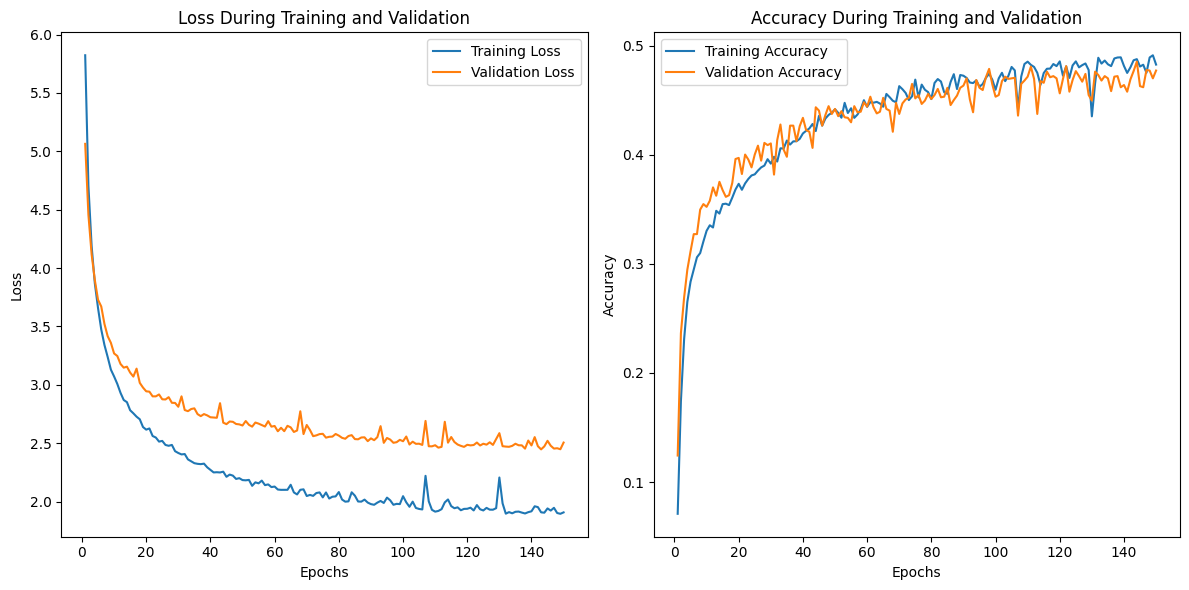

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss During Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy During Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Saving the model

In [20]:
model.save("rnn_model.keras")

Saving the tokenizer

In [21]:
import pickle

with open("rnn_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)